<a href="https://colab.research.google.com/github/Jane-Ngala/Core-Module-2-Week-4-IP-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

## 1.Defining the Question

### a) Specifying the Data Analytic Question#

- To build a model that determines whether or a not a passenger survives

### b) Defining the Metric of success

- The model will be considered successful if it is able to predict if a passenger survived or not

### c) Understanding the Context

- The data provides information on the Titanic accident showing whether a passenger surveved or not, their sex, the port they embarked on and their age

### d) Understanding the experimental design

- Loading the libraries and datasets
- Data cleaning and preparation
- Performing EDA
- Splitting the train dataset into train and test sets (80-20)
- Compute the accuracy (percentage of correct classification)
- Report the confusion matrix of each classifier.
- Repeat modelling using70-30 and 60-40
- Making conclusions and recommendations



### e) Appropriateness of the data

- The data is from a reliable source

## 2.Reading and Checking the Data

In [37]:
# Loading libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt



In [2]:
# Loading the data

train_url='https://archive.org/download/train5_202002/train%20%285%29.csv'
test_url= 'https://archive.org/download/test1_202002/test%20%281%29.csv'

train =pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [3]:
# Previewing top of the data
# Train data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Test data

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Previewing bottom of data
# Train data

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Test data

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
# Previewing the number of records

print(train.shape)
print(test.shape)



(891, 12)
(418, 11)


In [8]:
# Previewing the columns

print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
# Previewing the datatypes

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

- All datatypes are appropriate

## 3.Tidying the data set

Since we don't have the label for the test set, we will use the train set to create train and test data.
We shall tidy up the train dataset.

In [10]:
# Tidying column names

train.columns =train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
train.head(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


In [11]:
# Checking for duplicates

print(train.duplicated().sum())



0


- No duplicate records exist

In [12]:
# Checking for missing values

train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

- The missing values in the train data set:
      Age  177 records
      Cabin   687records
      Embarked  2 records

In [13]:
# Dealing with the missing values
# Imputing missing values in age with mean of age

train['age'].fillna(train['age'].mean(), inplace = True)

In [14]:
# Only 2 values are missing on column embarked
# Drop the missing values

train.dropna(subset=['embarked'], inplace = True)


In [15]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

- Missing values in cabin column are too many and the column is not necessary in our analysis.
- The column will be dropped
- The other unnecessary columns:
      passengerid 
      name 
      ticket
        







In [16]:
# Drop unnecessary columns
# Creating a function to drop columns

def drop_columns(data,columns):
  data.drop(columns, axis = 1, inplace = True)

  return data

cols = ['passengerid', 'name', 'ticket', 'cabin']
drop_columns(train,cols)
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


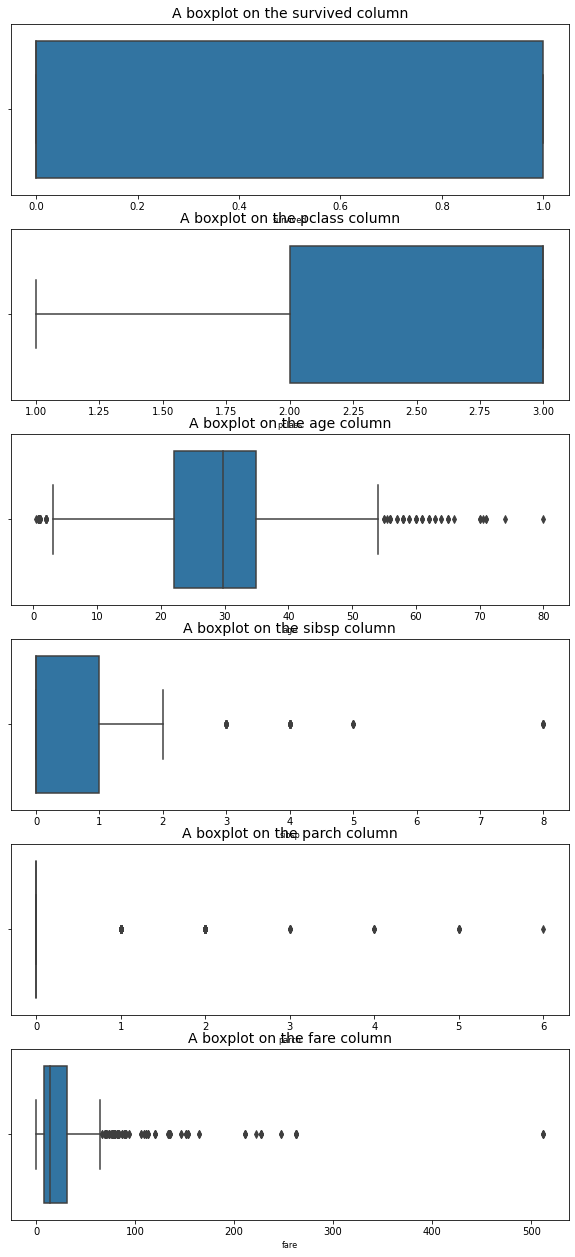

In [17]:
# Checking for outliers

col_names = ["survived", "pclass", "age", "sibsp", "parch", "fare"]
fig, ax = plt.subplots(len(col_names), figsize = (10,22))
for i, col_val in enumerate(col_names):

    sns.boxplot(x = train[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [18]:
# Define the outliers range 

Q3 = train[col_names].quantile(0.75)
Q1 = train[col_names].quantile(0.25)
IQR = Q3 - Q1

outliers = train[col_names][((train[col_names] < (Q1 - 1.5 * IQR))
 |(train[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(train))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (312, 6). Which translates to 35.09561304836895% of the data.


- The outliers are too many to drop, if dropped there will not be enough data for analysis.

## 4.EDA

In [19]:
# Previewing the statistical summary 

train.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.653446,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.968366,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


In [20]:
# Computing the mode

train.mode()
mode_df = pd.DataFrame(train.mode())
mode_df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,29.699118,0,0,8.05,S


- Most passengers were in the 3rd class
- Most passengers were male
- Most passengers paid 8.05 for fare
- Most passengers were aged 30
- Most passengers embarked on port S

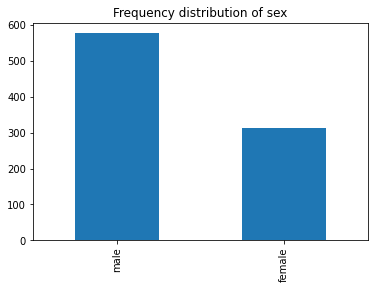

In [21]:
# Plotting a bar chart to show the frequency distribution of sex
# 
train['sex'].value_counts().plot.bar(title='Frequency distribution of sex')

- Most passengers were Male 

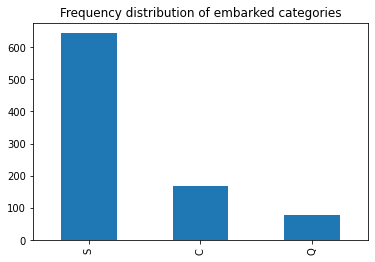

In [22]:
# Plotting a barchart to show frequency distribution of embarked category

train['embarked'].value_counts().plot.bar(title='Frequency distribution of embarked categories')

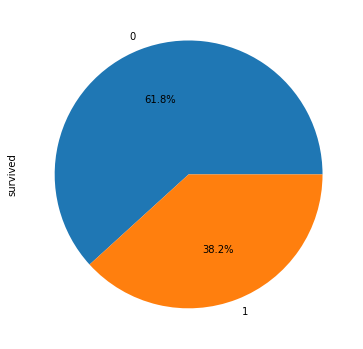

In [23]:
# Piechart visualization of survivors and non-survivors

plt.figure(figsize = (6, 8))
train.survived.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()
plt.show()


- There were less survivors than there was non-survivors.

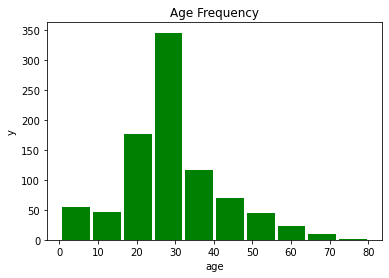

In [24]:
# Plotting a histogram to show frequency distribution for age

x = train['age']

plt.hist(x, histtype ='bar', rwidth = 0.9, color='green')
plt.xlabel('age')
plt.ylabel('y')
plt.title('Age Frequency')
plt.show()

# train['age'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied vs Pclass')

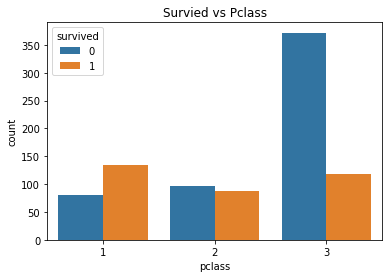

In [25]:
# Visualization of relationship between pclass and survived 

sns.countplot(train['pclass'], hue= train['survived'])
plt.title('Survied vs Pclass')

- Most survivors travelled in 1st class
- Majority of those that perished were in 3rd class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied vs Sex')

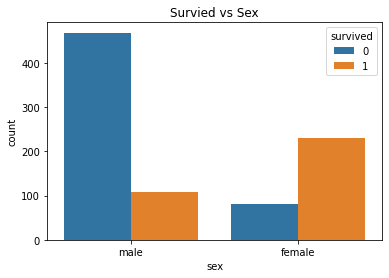

In [26]:
# Visualization of relationship between sex and survived

sns.countplot(train['sex'], hue= train['survived'])
plt.title('Survied vs Sex')

- Majority of the survivors were female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied vs Embarked')

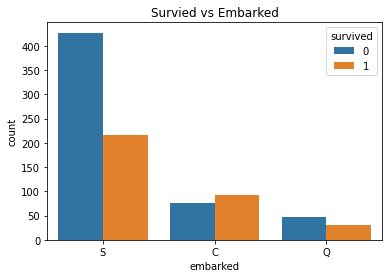

In [27]:
# Visualization of relationship between embarked and survived

sns.countplot(train['embarked'], hue= train['survived'])
plt.title('Survied vs Embarked')

- Majority of the survivors embarked on port S

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied vs Parch')

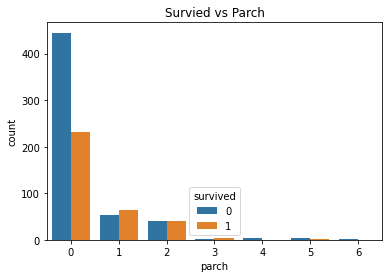

In [28]:
# Visualization of relationship between parch and survived

sns.countplot(train['parch'], hue= train['survived'])
plt.title('Survied vs Parch')

Text(0.5, 1.0, 'Heatmap of correlation')

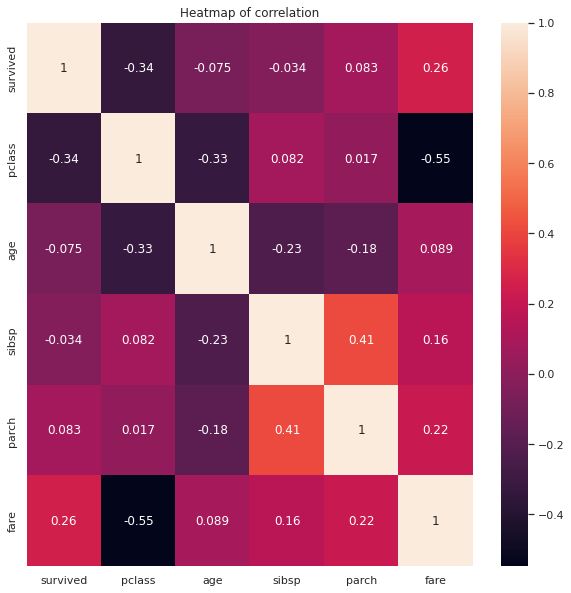

In [29]:
# Plotting correlation on a heatmap

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(train.corr(),annot=True)
plt.title('Heatmap of correlation')


## 5.KNN

***(i) 80-20 Split***

In [30]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [31]:
# Encoding the sex column

cat_enc = {'sex':{'male':0,'female':1}}
train.replace(cat_enc, inplace=True)
train['sex'].astype(int)

train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [34]:
# Splitting to train and test sets

X= train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = train['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [35]:
# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
# Training the model using KNN classifier
# Computing RMSEs for different values of k

rmse_val = [] 
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
# Fitting the model

    model.fit(X_train, y_train) 

# Making a prediction

    pred=model.predict(X_test)

# Computing RMSE

    RMSE = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(RMSE) 
    print('RMSE value for k= ' , K , 'is:', RMSE)

RMSE value for k=  1 is: 0.5083571247579155
RMSE value for k=  2 is: 0.5028011423654932
RMSE value for k=  3 is: 0.5352726911888783
RMSE value for k=  4 is: 0.524672182297103
RMSE value for k=  5 is: 0.5138530371810842
RMSE value for k=  6 is: 0.5138530371810842
RMSE value for k=  7 is: 0.49718307617612556
RMSE value for k=  8 is: 0.5138530371810842
RMSE value for k=  9 is: 0.5192907868894986
RMSE value for k=  10 is: 0.5083571247579155
RMSE value for k=  11 is: 0.5192907868894986
RMSE value for k=  12 is: 0.524672182297103
RMSE value for k=  13 is: 0.5083571247579155
RMSE value for k=  14 is: 0.5192907868894986
RMSE value for k=  15 is: 0.5138530371810842
RMSE value for k=  16 is: 0.5192907868894986
RMSE value for k=  17 is: 0.5138530371810842
RMSE value for k=  18 is: 0.5083571247579155
RMSE value for k=  19 is: 0.5138530371810842
RMSE value for k=  20 is: 0.5083571247579155
RMSE value for k=  21 is: 0.5083571247579155
RMSE value for k=  22 is: 0.5083571247579155
RMSE value for k=  2

- For best results, we should choose a k that has the least error:  k = 7

In [46]:
# Training the model

clf = KNeighborsClassifier(7)
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
14,0,1
159,0,0
763,1,1
741,0,0
483,1,1
...,...,...
886,0,0
673,1,0
182,0,0
632,1,1


In [47]:
# Evaluating peerformance

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       105
           1       0.72      0.66      0.69        73

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178

[[86 19]
 [25 48]]
model accuracy 0.7528089887640449


- Accuracy of the 80-20 split model is 75%

In [49]:
# Splitting the data 70-30

X= train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = train['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
# Training the model using KNN classifier
# Computing RMSEs for different values of k

rmse_val = [] 
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
# Fitting the model

    model.fit(X_train, y_train) 

# Making a prediction

    pred=model.predict(X_test)

# Computing RMSE

    RMSE = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(RMSE) 
    print('RMSE value for k= ' , K , 'is:', RMSE)

RMSE value for k=  1 is: 0.4660777450377519
RMSE value for k=  2 is: 0.4660777450377519
RMSE value for k=  3 is: 0.48188145619821826
RMSE value for k=  4 is: 0.47797951784114706
RMSE value for k=  5 is: 0.48188145619821826
RMSE value for k=  6 is: 0.4857520521621862
RMSE value for k=  7 is: 0.47007848575693784
RMSE value for k=  8 is: 0.47797951784114706
RMSE value for k=  9 is: 0.4660777450377519
RMSE value for k=  10 is: 0.44971901339751685
RMSE value for k=  11 is: 0.4538639767191222
RMSE value for k=  12 is: 0.44553548978636487
RMSE value for k=  13 is: 0.44971901339751685
RMSE value for k=  14 is: 0.4620423639315076
RMSE value for k=  15 is: 0.4660777450377519
RMSE value for k=  16 is: 0.4660777450377519
RMSE value for k=  17 is: 0.45797142674555125
RMSE value for k=  18 is: 0.4538639767191222
RMSE value for k=  19 is: 0.45797142674555125
RMSE value for k=  20 is: 0.45797142674555125
RMSE value for k=  21 is: 0.4538639767191222
RMSE value for k=  22 is: 0.45797142674555125
RMSE va

- The k value with the least error is  k=12

In [51]:
# Training the model

clf = KNeighborsClassifier(12)
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
14,0,1
159,0,0
763,1,1
741,0,1
483,1,0
...,...,...
620,0,0
821,1,0
65,1,0
884,0,0


In [52]:
# Evaluating the model

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       110

    accuracy                           0.80       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

[[136  21]
 [ 32  78]]
model accuracy 0.8014981273408239


- Accuracy of the 70-30 split is 80.1%

In [53]:
# Splitting the data 60-40

X= train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = train['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

# Standardizing the data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
# Training the model using KNN classifier
# Computing RMSEs for different values of k

rmse_val = [] 
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
# Fitting the model

    model.fit(X_train, y_train) 

# Making a prediction

    pred=model.predict(X_test)

# Computing RMSE

    RMSE = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(RMSE) 
    print('RMSE value for k= ' , K , 'is:', RMSE)

RMSE value for k=  1 is: 0.4886348789677424
RMSE value for k=  2 is: 0.4620423639315076
RMSE value for k=  3 is: 0.47699904600286197
RMSE value for k=  4 is: 0.4857520521621862
RMSE value for k=  5 is: 0.47993445245333805
RMSE value for k=  6 is: 0.48285201399158556
RMSE value for k=  7 is: 0.45592232730951643
RMSE value for k=  8 is: 0.46507218238834785
RMSE value for k=  9 is: 0.46808238975153255
RMSE value for k=  10 is: 0.4434289272060925
RMSE value for k=  11 is: 0.4620423639315076
RMSE value for k=  12 is: 0.46507218238834785
RMSE value for k=  13 is: 0.4740454631399772
RMSE value for k=  14 is: 0.4589925460215784
RMSE value for k=  15 is: 0.46808238975153255
RMSE value for k=  16 is: 0.4620423639315076
RMSE value for k=  17 is: 0.46808238975153255
RMSE value for k=  18 is: 0.4589925460215784
RMSE value for k=  19 is: 0.4589925460215784
RMSE value for k=  20 is: 0.45592232730951643
RMSE value for k=  21 is: 0.4528312928401491
RMSE value for k=  22 is: 0.45592232730951643
RMSE val

- Value of K with the least error is k = 10

In [55]:
# Training the model

clf = KNeighborsClassifier(10)
clf = clf.fit(X_train, y_train)

# Making prediction

y_pred = clf.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
comparison_frame

,actual,predicted
14,0,1
159,0,0
763,1,1
741,0,0
483,1,0
...,...,...
839,1,0
820,1,1
101,0,0
704,0,0


In [56]:
# Evaluating the model

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('model accuracy', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       216
           1       0.77      0.71      0.74       140

    accuracy                           0.80       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356

[[186  30]
 [ 40 100]]
model accuracy 0.8033707865168539


- Accuracy of the 60-40 split is 80.3%

## 6.Conclusion


- The 60-40 model had the highest accuracy score (80.3%) with a negligible difference from the 70-30 split (80.1%)